## Day 28 Lecture 2 Assignment

In this assignment, we will learn about overfitting and regularization. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Perform the same transformations in the previous assignment to meet model assumptions:
1. Remove all columns except: price, bedrooms, bathrooms, sqft_living, floors, waterfront
1. Remove outliers
1. Split the data into train and test subsets. 20% of the data should be in the test subset

In [4]:
#Remove all columns except: price, bedrooms, bathrooms, sqft_living, floors, waterfront:
price = king_county[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']]

In [5]:
threshold = 3
clean_price = price.copy()
print('house entries', price.shape[0])
for x in price.columns:
  if not np.array_equal(np.sort(price[x].unique()), np.array([0, 1])):
    q75, q25 = np.percentile(price[x], [75, 25])
    iqr = q75 - q25
    minValue = q25 - threshold*iqr
    maxValue = q75 + threshold*iqr
    outliers = price.loc[(price[x] < minValue) | (price[x] > maxValue)]
    clean_price = clean_price[clean_price[x] >= minValue]
    clean_price = clean_price[clean_price[x] <= maxValue]
    print(x, 'outliers:', outliers.shape[0])
print('house entries no outliers:', clean_price.shape[0])

house entries 21613
price outliers: 420
bedrooms outliers: 24
bathrooms outliers: 64
sqft_living outliers: 74
floors outliers: 0
house entries no outliers: 21132


In [14]:
X = clean_price.drop('price', axis=1)
y = clean_price['price']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Apply a ridge regression model with lambda=50 to the data and evaluate by looking at r squared for test and train

In [16]:
# answer below:
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)
print('train r^2:', ridge.score(X_train, y_train))
print('test r^2:', ridge.score(X_test, y_test))



train r^2: 0.4490647943939582
test r^2: 0.47048050576091094


In [22]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)
train_resid = y_train - train_pred
test_resid = y_test - test_pred



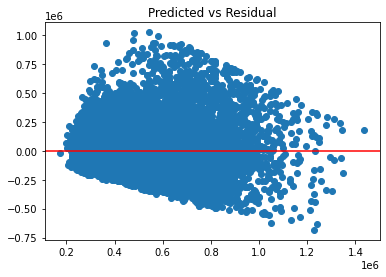

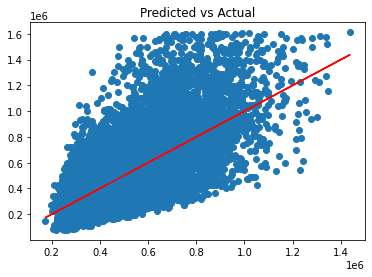

In [24]:
plt.title('Predicted vs Residual')
plt.scatter(train_pred, train_resid)
plt.axhline(c='r')
plt.show()
plt.title('Predicted vs Actual')
plt.plot(train_pred, train_pred, c='r')
plt.scatter(train_pred, y_train)
plt.show()

Perform a grid search for the following values of alpha: 0.001, 0.01, 0.1, 1, 10, 100, 1000 to find the most optimal ridge regression model. Experiment with different scoring metrics in the grid search (R^2 is the default, but you can use root mean squared error or many others). 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [37]:
#answer below:
grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

ridge_cv = GridSearchCV(Ridge(), grid, verbose=1, cv=5, scoring='neg_mean_absolute_error')
ridge_cv.fit(X_train, y_train)
ridge_cv.best_estimator_.alpha


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


0.001

Optimal Ridge Regression Lambda = 0.001